In [75]:
import math
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib.pyplot import pie, axis, show
from matplotlib import pyplot as plt
from matplotlib import cm as cm
%matplotlib inline


import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import missingno as msno

import chart_studio.plotly as py
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('./distorted_data_extra_field.csv', sep=',')

In [3]:
df.drop(df.columns[[0]], axis=1, inplace=True)

In [4]:
df.head()

,destinationCountry,roomCount,udid,email,phone,guest_country_code,is_cardless,stars,type,NormalizedTotalBookingPrice,NormalizedLowRate,numberOfBookedNights,numberOfReviews,AvgUserRating,hotel_id,hasSpecialRequest,hasFreeCancellation,cancelledOrNoShow,is_internal
0,0,1.0,0,0,0,0,0,4.0,HOTEL,229.0,166.0,1,103.0,3.9643,0,0,1,0,1
1,1,2.0,1,1,1,0,0,1.0,HOTEL,126.0,90.0,2,10.0,1.0000,1,0,0,1,0
2,2,1.0,2,2,2,0,0,5.0,HOTEL,1722.0,753.0,4,25.0,3.8000,2,1,0,1,0
3,0,1.0,3,3,3,1,0,3.5,UNKNOWN,685.0,373.0,2,16.0,3.6000,3,0,0,0,0
4,2,1.0,0,4,4,2,0,5.0,HOTEL,427.0,401.0,1,10.0,5.0000,4,0,0,0,1


In [5]:
df.describe()

,destinationCountry,roomCount,udid,email,phone,guest_country_code,is_cardless,stars,NormalizedTotalBookingPrice,NormalizedLowRate,numberOfBookedNights,numberOfReviews,AvgUserRating,hotel_id,hasSpecialRequest,hasFreeCancellation,cancelledOrNoShow,is_internal
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4.238000e+03,4.238000e+03,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000
mean,5.357480,1.221095,862.870694,1453.201982,1934.479471,3.039169,0.100047,3.569962,2.399232e+04,7.123140e+03,2.737848,32.320906,2.999598,599.586597,0.130722,0.240208,0.326097,0.43865
std,7.891933,0.635255,862.418205,1079.400480,1151.241212,6.078425,0.300098,1.413505,4.822504e+05,9.718227e+04,2.725926,33.591528,1.374999,483.547195,0.337136,0.427260,0.468839,0.49628
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.700000e+01,7.700000e+01,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,1.000000,0.000000,440.250000,926.250000,0.000000,0.000000,3.000000,3.260000e+02,2.030000e+02,1.000000,11.000000,2.714300,184.250000,0.000000,0.000000,0.000000,0.00000
50%,2.000000,1.000000,640.500000,1387.500000,1908.500000,0.000000,0.000000,4.000000,7.130000e+02,3.730000e+02,2.000000,20.000000,3.375000,469.000000,0.000000,0.000000,0.000000,0.00000
75%,8.000000,1.000000,1602.750000,2391.750000,2927.750000,3.000000,0.000000,4.500000,1.648750e+03,6.150000e+02,3.000000,39.000000,3.894700,957.000000,0.000000,0.000000,1.000000,1.00000
max,57.000000,13.000000,2625.000000,3425.000000,3971.000000,50.000000,1.000000,5.000000,2.570052e+07,2.655754e+06,31.000000,231.000000,5.000000,1740.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
def fillNA(data):
    data = np.array(data)
    toFloat = [float(floatValue) for floatValue in data]       
    biggestId = np.max(toFloat)                                
    print("Max id number available =", biggestId)
    
    for i in range (len(data)):
        if float(data[i]) == 0:
            data[i] = biggestId   
            biggestId = biggestId +1                           
    return data

In [7]:
df.fillna(0, inplace=True)

In [8]:
df.describe()

,destinationCountry,roomCount,udid,email,phone,guest_country_code,is_cardless,stars,NormalizedTotalBookingPrice,NormalizedLowRate,numberOfBookedNights,numberOfReviews,AvgUserRating,hotel_id,hasSpecialRequest,hasFreeCancellation,cancelledOrNoShow,is_internal
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4.238000e+03,4.238000e+03,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000
mean,5.357480,1.221095,862.870694,1453.201982,1934.479471,3.039169,0.100047,3.569962,2.399232e+04,7.123140e+03,2.737848,32.320906,2.999598,599.586597,0.130722,0.240208,0.326097,0.43865
std,7.891933,0.635255,862.418205,1079.400480,1151.241212,6.078425,0.300098,1.413505,4.822504e+05,9.718227e+04,2.725926,33.591528,1.374999,483.547195,0.337136,0.427260,0.468839,0.49628
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.700000e+01,7.700000e+01,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,1.000000,0.000000,440.250000,926.250000,0.000000,0.000000,3.000000,3.260000e+02,2.030000e+02,1.000000,11.000000,2.714300,184.250000,0.000000,0.000000,0.000000,0.00000
50%,2.000000,1.000000,640.500000,1387.500000,1908.500000,0.000000,0.000000,4.000000,7.130000e+02,3.730000e+02,2.000000,20.000000,3.375000,469.000000,0.000000,0.000000,0.000000,0.00000
75%,8.000000,1.000000,1602.750000,2391.750000,2927.750000,3.000000,0.000000,4.500000,1.648750e+03,6.150000e+02,3.000000,39.000000,3.894700,957.000000,0.000000,0.000000,1.000000,1.00000
max,57.000000,13.000000,2625.000000,3425.000000,3971.000000,50.000000,1.000000,5.000000,2.570052e+07,2.655754e+06,31.000000,231.000000,5.000000,1740.000000,1.000000,1.000000,1.000000,1.00000


In [9]:
avgUserRating = df.loc[df['AvgUserRating'] == 0]

print(len(avgUserRating))

563


In [10]:
bookedNights = df.loc[df['numberOfBookedNights'] <= 0]

print(len(bookedNights))

0


In [11]:
numReviews = df.loc[df['numberOfReviews'] <= 0]

print(len(numReviews))

0


In [12]:
stars = df.loc[df['stars'] == 0]

print(len(stars))

399


In [13]:
roomCount = df.loc[df['roomCount'] <= 0 ]

print(len(roomCount))

3


In [16]:
indexes_to_drop = df[df['roomCount'] == 0].index.tolist()
df.drop(df.index[indexes_to_drop], inplace=True)

In [17]:
canPerc = df.loc[df['cancelledOrNoShow'] == 1]
print(len(canPerc) / len(df) * 100)

32.585596221959854


In [18]:
reviews_cancel = df[['AvgUserRating', 'cancelledOrNoShow']].groupby(['AvgUserRating'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=True)
reviews_cancel

,AvgUserRating,cancelledOrNoShow
60,3.0909,0.0
122,3.7273,0.0
25,2.5833,0.0
33,2.7368,0.0
36,2.7778,0.0
...,...,...
65,3.1364,1.0
50,2.9167,1.0
38,2.7857,1.0
15,2.3000,1.0


In [19]:
building_type = df[['type', 'cancelledOrNoShow']].groupby(['type'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=True)
building_type[:35]

,type,cancelledOrNoShow
4,CHALET,0.000000
14,RIAD,0.000000
11,MOTEL,0.000000
16,UNKNOWN,0.234234
9,HOTEL_RESORT,0.238342
5,GUEST_HOUSE,0.250000
8,HOTEL,0.324435
3,BED_BREAKFAST,0.333333
2,APART_HOTEL,0.341176
17,VILLA,0.352941


In [20]:
stars = df[['stars', 'cancelledOrNoShow']].groupby(['stars'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=True)
stars[:20]

,stars,cancelledOrNoShow
8,5.0,0.256925
5,3.5,0.274336
6,4.0,0.316870
3,2.5,0.333333
4,3.0,0.352736
1,1.0,0.355556
7,4.5,0.368421
2,2.0,0.380531
0,0.0,0.471178


In [21]:
roomCount = df[['roomCount', 'cancelledOrNoShow']].groupby(['roomCount'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=True)
roomCount[:30]

,roomCount,cancelledOrNoShow
9,13.0,0.000000
4,5.0,0.142857
3,4.0,0.272727
1,2.0,0.304940
0,1.0,0.328981
2,3.0,0.329268
7,8.0,0.400000
5,6.0,0.666667
6,7.0,0.750000
8,10.0,1.000000


In [56]:
booked_cancel = df[['numberOfBookedNights', 'cancelledOrNoShow']].groupby(['numberOfBookedNights'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=True)
booked_cancel[:30]

,numberOfBookedNights,cancelledOrNoShow
27,28,0.000000
22,23,0.000000
20,21,0.000000
15,16,0.250000
0,1,0.280069
1,2,0.319239
13,14,0.333333
3,4,0.339934
4,5,0.364807
9,10,0.369565


In [22]:
special_request = df[['hasSpecialRequest', 'cancelledOrNoShow']].groupby(['hasSpecialRequest'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=True)
special_request[:30]

,hasSpecialRequest,cancelledOrNoShow
1,1,0.299639
0,0,0.329802


In [23]:
free_cancel = df[['hasFreeCancellation', 'cancelledOrNoShow']].groupby(['hasFreeCancellation'], as_index=False).mean().sort_values(by='cancelledOrNoShow', ascending=True) 
free_cancel

,hasFreeCancellation,cancelledOrNoShow
0,0,0.299658
1,1,0.408644


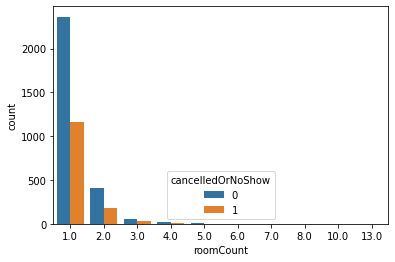

In [24]:
sns.countplot(x='roomCount', hue='cancelledOrNoShow', data=df)
plt.show()

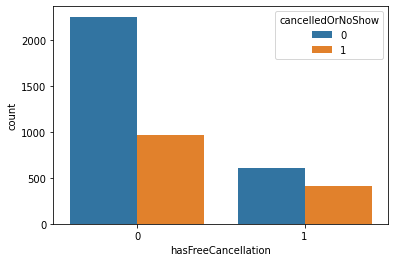

In [25]:
sns.countplot(x='hasFreeCancellation', hue='cancelledOrNoShow', data=df)
plt.show()

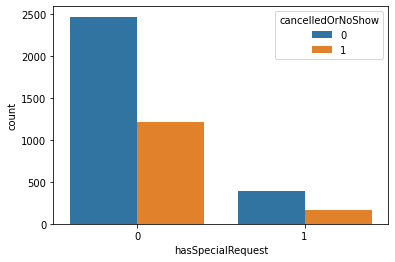

In [26]:
sns.countplot(x='hasSpecialRequest', hue='cancelledOrNoShow', data=df)
plt.show()

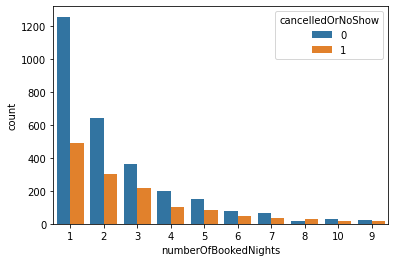

In [27]:
sns.countplot(x='numberOfBookedNights', hue='cancelledOrNoShow', data=df, order=df.numberOfBookedNights.value_counts().iloc[:10].index)
plt.show()

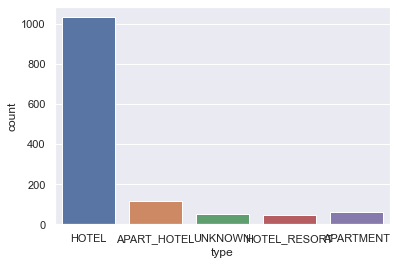

In [28]:
cancelled_orders = df.loc[df['cancelledOrNoShow'] == 1]

sns.set()
sns.countplot(x='type', data=cancelled_orders, order=df.type.value_counts().iloc[:5].index)
plt.show()

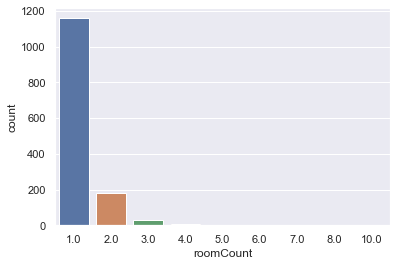

In [29]:
sns.countplot(x="roomCount", data=cancelled_orders)
plt.show()

In [30]:
df.describe()

,destinationCountry,roomCount,udid,email,phone,guest_country_code,is_cardless,stars,NormalizedTotalBookingPrice,NormalizedLowRate,numberOfBookedNights,numberOfReviews,AvgUserRating,hotel_id,hasSpecialRequest,hasFreeCancellation,cancelledOrNoShow,is_internal
count,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4.235000e+03,4.235000e+03,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000,4235.000000
mean,5.356553,1.221960,863.163872,1452.939315,1934.366942,3.041322,0.100118,3.569421,2.400571e+04,7.127706e+03,2.734120,32.330106,2.998826,599.422196,0.130815,0.240378,0.325856,0.438961
std,7.894133,0.634647,862.487689,1079.715284,1151.614422,6.080039,0.300193,1.413804,4.824209e+05,9.721655e+04,2.723028,33.600337,1.374989,483.588705,0.337237,0.427363,0.468749,0.496319
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.700000e+01,7.700000e+01,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,439.500000,925.500000,0.000000,0.000000,3.000000,3.260000e+02,2.030000e+02,1.000000,11.000000,2.714300,184.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,641.000000,1386.000000,1908.000000,0.000000,0.000000,4.000000,7.120000e+02,3.730000e+02,2.000000,20.000000,3.375000,469.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,1.000000,1603.500000,2392.500000,2928.500000,3.000000,0.000000,4.500000,1.647500e+03,6.150000e+02,3.000000,39.000000,3.894700,956.500000,0.000000,0.000000,1.000000,1.000000
max,57.000000,13.000000,2625.000000,3425.000000,3971.000000,50.000000,1.000000,5.000000,2.570052e+07,2.655754e+06,31.000000,231.000000,5.000000,1740.000000,1.000000,1.000000,1.000000,1.000000


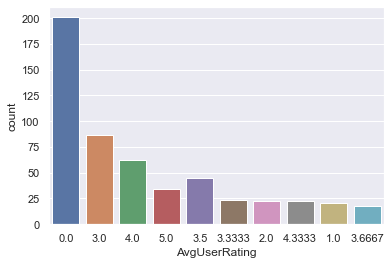

In [31]:
sns.countplot(x="AvgUserRating", data=cancelled_orders, order=df.AvgUserRating.value_counts().iloc[:10].index)
plt.show()

<AxesSubplot:xlabel='roomCount', ylabel='Count'>

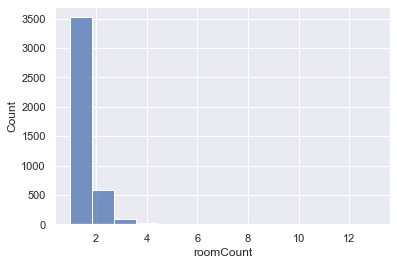

In [32]:
sns.histplot(data=df, x="roomCount")

In [45]:
labels, levels = pd.factorize(df['type'])
df['type']= labels

In [46]:
df_target = df['cancelledOrNoShow']
df_all = df.drop(['cancelledOrNoShow'], axis=1)
df_selected = df[['AvgUserRating', 'roomCount', 'hasFreeCancellation', 'hasSpecialRequest']]

In [47]:
import imblearn

In [48]:
print(imblearn.__version__)
from imblearn.over_sampling import SMOTE
from collections import Counter 

0.8.0


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lReg = LogisticRegression()

In [51]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(df_selected,df['cancelledOrNoShow'],test_size=0.30, random_state=101)

In [52]:
df_selected.head()

,AvgUserRating,roomCount,hasFreeCancellation,hasSpecialRequest
0,3.9643,1.0,1,0
1,1.0000,2.0,0,0
2,3.8000,1.0,0,1
3,3.6000,1.0,0,0
4,5.0000,1.0,0,0


In [56]:
lReg.fit(X_train, Y_train)

Y_pred = lReg.predict(X_test)

lReg.score(X_test, Y_test)

0.6789929189614476

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(df_selected, np.ravel(df_target), test_size=0.30, random_state=101)

In [59]:
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
counter = Counter(Y_train)
print(counter)

Counter({0: 1992, 1: 1992})


In [60]:
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
counter = Counter(Y_train)
print(counter)

Counter({0: 1992, 1: 1992})


In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dtree = DecisionTreeClassifier()

In [63]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [64]:
prediction = dtree.predict(X_test)

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(confusion_matrix(Y_test,prediction))

[[572 291]
 [212 196]]


In [68]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.73      0.66      0.69       863
           1       0.40      0.48      0.44       408

    accuracy                           0.60      1271
   macro avg       0.57      0.57      0.57      1271
weighted avg       0.62      0.60      0.61      1271



In [69]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=4)
randfor.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=4)

In [71]:
rand_pred = randfor.predict(X_test)

In [72]:
print(confusion_matrix(Y_test,rand_pred))

[[566 297]
 [221 187]]


In [74]:
print(classification_report(Y_test, rand_pred))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       863
           1       0.39      0.46      0.42       408

    accuracy                           0.59      1271
   macro avg       0.55      0.56      0.55      1271
weighted avg       0.61      0.59      0.60      1271

